In [1]:
%matplotlib inline
from BasicAction import *
import numpy as np

In [2]:
# 线性规划求最小值，只能求最小值，最大值请求反
c = [-1,4]#target
A = [
    [-3,1],
    [1,2]
]# 线性范围矩阵
b = [6,4] # 线性范围矩阵
bounds = [(None,None),(-3,None)]

opt = baseOptimize()
opt.linear_optimize(c=c,A=A,b=b,Aeq=None,beq=None,limitTuple=bounds)



2020-09-06 16:28:32,822 basicAction.py[line:46] INFO 最小值为：-21.999999840824934
2020-09-06 16:28:32,822 basicAction.py[line:46] INFO 最小值为：-21.999999840824934
2020-09-06 16:28:32,825 basicAction.py[line:46] INFO 最佳解为：[ 9.99999989 -2.99999999]
2020-09-06 16:28:32,825 basicAction.py[line:46] INFO 最佳解为：[ 9.99999989 -2.99999999]


(-21.999999840824934, array([ 9.99999989, -2.99999999]))

In [3]:
matrix = np.array([
    [1,2,3],
    [4,5,6]
])
np.sum(matrix,axis=0)


array([5, 7, 9])

In [4]:
a=np.c_[np.zeros(4),np.diag([0.025,0.015,0.055,0.025])]
print(a)
print(np.zeros(4))

[[0.    0.025 0.    0.    0.   ]
 [0.    0.    0.015 0.    0.   ]
 [0.    0.    0.    0.055 0.   ]
 [0.    0.    0.    0.    0.025]]
[0. 0. 0. 0.]


In [5]:
# 优化曲线
c = [-0.05, -0.27, -0.19, -0.185, -0.185] #target
A = np.c_[np.zeros(4),np.diag([0.025,0.015,0.055,0.025])]
Aeq=[[1, 1.01, 1.02, 1.045, 1.065]]
beq = [1]

In [6]:
# 边界优化分析
from scipy.optimize import linprog
a=0
aa=[]
ss=[]
while a<0.05:
    b = np.ones(4)*a
    res=linprog(c,A,b,Aeq,beq)
    a =a +0.001
    aa.append(a)
    ss.append(-res.fun)
print(len(aa))
print(len(ss))

50
50


2020-09-06 16:28:33,003 basicAction.py[line:46] INFO scatter xlabelinput xlable
 ylabelinput ylable
2020-09-06 16:28:33,003 basicAction.py[line:46] INFO scatter xlabelinput xlable
 ylabelinput ylable
2020-09-06 16:28:33,003 basicAction.py[line:46] INFO scatter xlabelinput xlable
 ylabelinput ylable
2020-09-06 16:28:33,139 basicAction.py[line:46] INFO draw scatter E:\ModelCom\savedata\graphDir20200906\scater\input_title16_28_33_scater.png
2020-09-06 16:28:33,139 basicAction.py[line:46] INFO draw scatter E:\ModelCom\savedata\graphDir20200906\scater\input_title16_28_33_scater.png
2020-09-06 16:28:33,139 basicAction.py[line:46] INFO draw scatter E:\ModelCom\savedata\graphDir20200906\scater\input_title16_28_33_scater.png


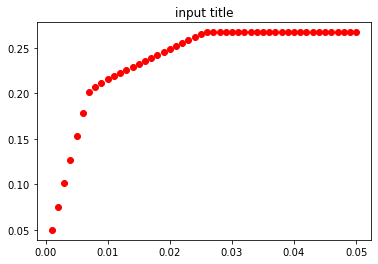

In [7]:
graph = baseGraph()

graph.scatter([aa],[ss])

In [8]:
# 整数优化

import cvxpy as cp
c = np.array([40,90])
a = np.array([
    [9,7],
    [-7,-20]
])
b = np.array([56,-70])
x =cp.Variable(2,integer=True)#整数限制
obj = cp.Minimize(c*x)
cons = [a*x<=b,x>=0]
prob = cp.Problem(obj,cons)
prob.solve(solver='GLPK_MI',verbose=True)
print(prob.value)
print(x.value)


350.0
[2. 3.]


d:\env_model_com\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
d:\env_model_com\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [9]:
c = np.array([
    [4,8,7,15,12],
    [7,9,17,14,10],
    [6,9,12,8,7],
    [6,7,14,6,10],
    [6,9,12,10,6]
])
x = cp.Variable(shape=(5,5),integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
con =[
    x>=0,x<=1,
    cp.sum(x,axis=1,keepdims=True)==1,
    cp.sum(x,axis=0,keepdims=True)==1
]
prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI',verbose=True)
print(prob.value)
print(x.value)




34.0
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [10]:
c2 = np.array([1,1,3,4,2])
c1 = np.array([-8,-2,-3,-1,-2])
x = cp.Variable(5,integer=True)
b = np.array([400,800,200,200])
a = np.array([
    [1,1,1,1,1],
    [1,2,2,1,6],
    [2,1,6,0,0],
    [0,0,1,1,5]
])
obj = cp.Minimize(c2*x**2+c1*x)
con = [0<=x,x<=99, a*x<=b]
prob= cp.Problem(obj,con)
prob.solve()# 安装cplex可以解决

print(x.value)
print(prob.value)


d:\env_model_com\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
d:\env_model_com\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
d:\env_model_com\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning:

[4. 1. 0. 0. 0.]
-17.0
